# Intro to Numerical Methods:
### Finite Differencing and Understanding Velocities and Accelerations

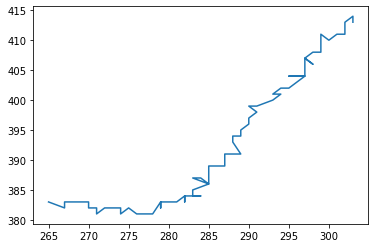

In [1]:
import numpy as np
import matplotlib.pyplot as plt

path = "4.18mm\\Day6_4_18mm_Droplet (1).csv"
data = np.loadtxt(path, dtype = float, delimiter = ",")

frame = data[:,0]
x = data[:,1]
y = data[:,2]

plt.plot(x,y)
plt.show()